# Data Importation & Data Cleaning
"Google Play Store Apps" Dataset imported from Kaggle: https://www.kaggle.com/datasets/lava18/google-play-store-apps?select=googleplaystore_user_reviews.csv 

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [146]:
df=pd.read_csv("googleplaystore.csv")

In [147]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [148]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [149]:
df.shape

(10841, 13)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


[FR] Nous pouvons voir que toutes les variables n'ont pas le bon format (Rating, Reviews and Size). Mais d'abord, supprimons les colonnes qui ne nous intéressent pas. 

[EN] We can see that not all variables have the right format (Rating, Reviews and Size). But first, let's remove the columns we are not interested in.

In [151]:
df.drop(["Genres","Current Ver", "Android Ver"], axis=1, inplace=True)

In [152]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,"June 20, 2018"


[FR] La variable "Catégorie" est en majuscule avec des "_".  Mettons-la dans un format plus lisible.

[EN] The "Category" variable is capitalized with a "_".  Let's put it in a more readable format.

In [153]:
df["Category"]=df["Category"].str.title()
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art_And_Design,4.1,159,19M,"10,000+",Free,0,Everyone,"January 7, 2018"
1,Coloring book moana,Art_And_Design,3.9,967,14M,"500,000+",Free,0,Everyone,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art_And_Design,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,"August 1, 2018"
3,Sketch - Draw & Paint,Art_And_Design,4.5,215644,25M,"50,000,000+",Free,0,Teen,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,Art_And_Design,4.3,967,2.8M,"100,000+",Free,0,Everyone,"June 20, 2018"


In [154]:
df["Category"] = [i.split('(')[0].replace("_", " ") for i in df["Category"]]
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.1,159,19M,"10,000+",Free,0,Everyone,"January 7, 2018"
1,Coloring book moana,Art And Design,3.9,967,14M,"500,000+",Free,0,Everyone,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,"August 1, 2018"
3,Sketch - Draw & Paint,Art And Design,4.5,215644,25M,"50,000,000+",Free,0,Teen,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967,2.8M,"100,000+",Free,0,Everyone,"June 20, 2018"


In [155]:
df.loc[df["Size"] == "Varies with device"] 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
37,Floor Plan Creator,Art And Design,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,"July 14, 2018"
42,Textgram - write on photos,Art And Design,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,"July 30, 2018"
52,Used Cars and Trucks for Sale,Auto And Vehicles,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,"July 30, 2018"
67,Ulysse Speedometer,Auto And Vehicles,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,"July 30, 2018"
68,REPUVE,Auto And Vehicles,3.9,356,Varies with device,"100,000+",Free,0,Everyone,"May 25, 2018"
...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,Weather,4.4,3471,Varies with device,"100,000+",Free,0,Everyone,"July 24, 2018"
10725,Posta App,Maps And Navigation,3.6,8,Varies with device,"1,000+",Free,0,Everyone,"September 27, 2017"
10765,Chat For Strangers - Video Chat,Social,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,"May 23, 2018"
10826,Frim: get new friends on local chat rooms,Social,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,"March 23, 2018"


[FR] Nous ne pouvons pas garder ces lignes qui ont ces données textuelles dans leur colonne "taille" car elles ne nous donnent aucune information quantitative et précise à ce sujet, et la colonne "taille" est importante pour notre analyse. Une solution aurait pu être de conserver ces lignes mais de supprimer la colonne "taille" pour conserver le reste des informations.

[EN] We cannot keep those rows that have this text data in their "size" column because they do not give us any quantitative and precise information about it, and the size column is important for our analysis. A solution could have been to keep these rows but remove the "size" column to keep the rest of the information.

In [156]:
df= df.loc[df["Size"] != "Varies with device"] 

[FR] La colonne "Taille" comprend une donnée numérique et une lettre pour indiquer la taille du fichier. Nous extrayons donc la valeur numérique tout en prenant en compte la taille du fichier.

[EN] The "Size" column includes a numeric data and a letter to indicate the size of the file. We therefore extract the numerical value while taking into account the size of the file.

In [258]:
df["nSize"]=df["Size"]
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,nSize,lastUpdated_Year,lastUpdated_Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.1,159.0,19M,"10,000+",Free,0.0,Everyone,2018-01-07,19M,2018,1
1,Coloring book moana,Art And Design,3.9,967.0,14M,"500,000+",Free,0.0,Everyone,2018-01-15,14M,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,4.7,87510.0,8.7M,"5,000,000+",Free,0.0,Everyone,2018-08-01,8.7M,2018,8
3,Sketch - Draw & Paint,Art And Design,4.5,215644.0,25M,"50,000,000+",Free,0.0,Teen,2018-06-08,25M,2018,6
4,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967.0,2.8M,"100,000+",Free,0.0,Everyone,2018-06-20,2.8M,2018,6


[FR] Les données de l'une des lignes sont complètement désordonnées. Pour éviter toute source d'erreur, il est décidé de supprimer cette ligne. 

[EN] One of the lines has its data completely out of order. To avoid any sources of error, it is decided to remove this line. 

In [160]:
df.loc[df["Reviews"] == "3.0M"] 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,nSize
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,1.0.19,"1,000+"


In [161]:
df= df.loc[df["Reviews"] != "3.0M"] 

In [162]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,nSize
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.1,159,19M,"10,000+",Free,0,Everyone,"January 7, 2018",19
1,Coloring book moana,Art And Design,3.9,967,14M,"500,000+",Free,0,Everyone,"January 15, 2018",14
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,"August 1, 2018",8.7
3,Sketch - Draw & Paint,Art And Design,4.5,215644,25M,"50,000,000+",Free,0,Teen,"June 8, 2018",25
4,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967,2.8M,"100,000+",Free,0,Everyone,"June 20, 2018",2.8


In [159]:
size=["k","M","G"]
for i in size: 
    X=df["nSize"].str.split(i, expand=True)
    df["nSize"]=X[0]

In [163]:
df["nSize"]=df["nSize"].astype("float")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,nSize
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.1,159,19M,"10,000+",Free,0,Everyone,"January 7, 2018",19.0
1,Coloring book moana,Art And Design,3.9,967,14M,"500,000+",Free,0,Everyone,"January 15, 2018",14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,"August 1, 2018",8.7
3,Sketch - Draw & Paint,Art And Design,4.5,215644,25M,"50,000,000+",Free,0,Teen,"June 8, 2018",25.0
4,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967,2.8M,"100,000+",Free,0,Everyone,"June 20, 2018",2.8


In [164]:
df.loc[df["Size"].str.endswith("k") == True, "nSize" ] = df["nSize"]/1000
df.loc[df["Size"].str.endswith("M") == True, "nSize" ] = df["nSize"]
df.loc[df["Size"].str.endswith("G") == True, "nSize" ] = df["nSize"]*1000

In [165]:
df.loc[df["Size"].str.endswith("M") == True]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,nSize
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.1,159,19M,"10,000+",Free,0,Everyone,"January 7, 2018",19.0
1,Coloring book moana,Art And Design,3.9,967,14M,"500,000+",Free,0,Everyone,"January 15, 2018",14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,"August 1, 2018",8.7
3,Sketch - Draw & Paint,Art And Design,4.5,215644,25M,"50,000,000+",Free,0,Teen,"June 8, 2018",25.0
4,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967,2.8M,"100,000+",Free,0,Everyone,"June 20, 2018",2.8
...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,Business,NaN,0,9.6M,10+,Free,0,Everyone,"September 29, 2016",9.6
10836,Sya9a Maroc - FR,Family,4.5,38,53M,"5,000+",Free,0,Everyone,"July 25, 2017",53.0
10837,Fr. Mike Schmitz Audio Teachings,Family,5.0,4,3.6M,100+,Free,0,Everyone,"July 6, 2018",3.6
10838,Parkinson Exercices FR,Medical,NaN,3,9.5M,"1,000+",Free,0,Everyone,"January 20, 2017",9.5


In [166]:
df.loc[df["Size"].str.endswith("k") == True]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,nSize
58,Restart Navigator,Auto And Vehicles,4.0,1403,201k,"100,000+",Free,0,Everyone,"August 26, 2014",0.201
209,Plugin:AOT v5.0,Business,3.1,4034,23k,"100,000+",Free,0,Everyone,"September 11, 2015",0.023
384,Hangouts Dialer - Call Phones,Communication,4.0,122498,79k,"10,000,000+",Free,0,Everyone,"September 2, 2015",0.079
450,Caller ID +,Communication,4.0,9498,118k,"1,000,000+",Free,0,Everyone,"June 7, 2016",0.118
458,GO Notifier,Communication,4.2,124346,695k,"10,000,000+",Free,0,Everyone,"July 6, 2014",0.695
...,...,...,...,...,...,...,...,...,...,...,...
10763,FP Разбитый дисплей,Family,4.5,922,552k,"50,000+",Free,0,Everyone,"September 20, 2014",0.552
10764,FP Transportation,Auto And Vehicles,NaN,1,885k,1+,Free,0,Everyone,"March 9, 2018",0.885
10798,Word Search Tab 1 FR,Family,NaN,0,1020k,50+,Paid,$1.04,Everyone,"February 6, 2012",1.020
10832,FR Tides,Weather,3.8,1195,582k,"100,000+",Free,0,Everyone,"February 16, 2014",0.582


In [167]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,nSize
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.1,159,19M,"10,000+",Free,0,Everyone,"January 7, 2018",19.0
1,Coloring book moana,Art And Design,3.9,967,14M,"500,000+",Free,0,Everyone,"January 15, 2018",14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,"August 1, 2018",8.7
3,Sketch - Draw & Paint,Art And Design,4.5,215644,25M,"50,000,000+",Free,0,Teen,"June 8, 2018",25.0
4,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967,2.8M,"100,000+",Free,0,Everyone,"June 20, 2018",2.8


(FR)  Les applications payantes ont une valeur $ associée à leurs données numériques, nous allons donc la supprimer.

(EN) Paid applications have a $ value associated with their numeric data, so we will remove it.

In [168]:
Y=df["Price"].str.split("$", expand=True)
df["Price"]=Y[1]

In [169]:
df.loc[df["Type"] == "Paid"] 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,nSize
234,TurboScan: scan documents and receipts in PDF,Business,4.7,11442,6.8M,"100,000+",Paid,4.99,Everyone,"March 25, 2018",6.800
235,Tiny Scanner Pro: PDF Doc Scan,Business,4.8,10295,39M,"100,000+",Paid,4.99,Everyone,"April 11, 2017",39.000
290,TurboScan: scan documents and receipts in PDF,Business,4.7,11442,6.8M,"100,000+",Paid,4.99,Everyone,"March 25, 2018",6.800
291,Tiny Scanner Pro: PDF Doc Scan,Business,4.8,10295,39M,"100,000+",Paid,4.99,Everyone,"April 11, 2017",39.000
477,Calculator,Dating,2.6,57,6.2M,"1,000+",Paid,6.99,Everyone,"October 25, 2017",6.200
...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,Family,NaN,17,157k,100+,Paid,0.99,Mature 17+,"November 25, 2015",0.157
10760,Fast Tract Diet,Health And Fitness,4.4,35,2.4M,"1,000+",Paid,7.99,Everyone,"August 8, 2018",2.400
10782,Trine 2: Complete Story,Game,3.8,252,11M,"10,000+",Paid,16.99,Teen,"February 27, 2015",11.000
10785,"sugar, sugar",Family,4.2,1405,9.5M,"10,000+",Paid,1.20,Everyone,"June 5, 2018",9.500


In [170]:
df.loc[df["Type"] == "Free"] 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,nSize
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.1,159,19M,"10,000+",Free,None,Everyone,"January 7, 2018",19.0
1,Coloring book moana,Art And Design,3.9,967,14M,"500,000+",Free,None,Everyone,"January 15, 2018",14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,4.7,87510,8.7M,"5,000,000+",Free,None,Everyone,"August 1, 2018",8.7
3,Sketch - Draw & Paint,Art And Design,4.5,215644,25M,"50,000,000+",Free,None,Teen,"June 8, 2018",25.0
4,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967,2.8M,"100,000+",Free,None,Everyone,"June 20, 2018",2.8
...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,Business,NaN,0,9.6M,10+,Free,None,Everyone,"September 29, 2016",9.6
10836,Sya9a Maroc - FR,Family,4.5,38,53M,"5,000+",Free,None,Everyone,"July 25, 2017",53.0
10837,Fr. Mike Schmitz Audio Teachings,Family,5.0,4,3.6M,100+,Free,None,Everyone,"July 6, 2018",3.6
10838,Parkinson Exercices FR,Medical,NaN,3,9.5M,"1,000+",Free,None,Everyone,"January 20, 2017",9.5


In [171]:
df["Rating"]=df["Rating"].astype("float")
df["Reviews"]=df["Reviews"].astype("float")
df["Price"]=df["Price"].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9145 non-null   object 
 1   Category        9145 non-null   object 
 2   Rating          7729 non-null   float64
 3   Reviews         9145 non-null   float64
 4   Size            9145 non-null   object 
 5   Installs        9145 non-null   object 
 6   Type            9145 non-null   object 
 7   Price           724 non-null    float64
 8   Content Rating  9145 non-null   object 
 9   Last Updated    9145 non-null   object 
 10  nSize           9145 non-null   float64
dtypes: float64(4), object(7)
memory usage: 1.1+ MB


In [172]:
df.loc[df['Price'].isnull(), 'Price']=0
df.loc[df["Type"] == "Free"] 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,nSize
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.1,159.0,19M,"10,000+",Free,0.0,Everyone,"January 7, 2018",19.0
1,Coloring book moana,Art And Design,3.9,967.0,14M,"500,000+",Free,0.0,Everyone,"January 15, 2018",14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,4.7,87510.0,8.7M,"5,000,000+",Free,0.0,Everyone,"August 1, 2018",8.7
3,Sketch - Draw & Paint,Art And Design,4.5,215644.0,25M,"50,000,000+",Free,0.0,Teen,"June 8, 2018",25.0
4,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967.0,2.8M,"100,000+",Free,0.0,Everyone,"June 20, 2018",2.8
...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,Business,NaN,0.0,9.6M,10+,Free,0.0,Everyone,"September 29, 2016",9.6
10836,Sya9a Maroc - FR,Family,4.5,38.0,53M,"5,000+",Free,0.0,Everyone,"July 25, 2017",53.0
10837,Fr. Mike Schmitz Audio Teachings,Family,5.0,4.0,3.6M,100+,Free,0.0,Everyone,"July 6, 2018",3.6
10838,Parkinson Exercices FR,Medical,NaN,3.0,9.5M,"1,000+",Free,0.0,Everyone,"January 20, 2017",9.5


In [173]:
df.shape

(9145, 11)

In [174]:
df["Last Updated"]= pd.to_datetime(df["Last Updated"])
df["lastUpdated_Year"]=df["Last Updated"].dt.year
df["lastUpdated_Month"]=df["Last Updated"].dt.month
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,nSize,lastUpdated_Year,lastUpdated_Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.1,159.0,19M,"10,000+",Free,0.0,Everyone,2018-01-07,19.0,2018,1
1,Coloring book moana,Art And Design,3.9,967.0,14M,"500,000+",Free,0.0,Everyone,2018-01-15,14.0,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,4.7,87510.0,8.7M,"5,000,000+",Free,0.0,Everyone,2018-08-01,8.7,2018,8
3,Sketch - Draw & Paint,Art And Design,4.5,215644.0,25M,"50,000,000+",Free,0.0,Teen,2018-06-08,25.0,2018,6
4,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967.0,2.8M,"100,000+",Free,0.0,Everyone,2018-06-20,2.8,2018,6


In [175]:
duplicates=df[df.duplicated(["App","Category"], keep=False)]

[FR] Nous rechercherons les applications qui se répètent deux fois dans la même catégorie. Comme certaines applications se répètent deux fois mais dans deux catégories différentes, nous les garderons mais les prendrons en compte pour les analyses globales.

[EN] We will look for applications that repeat twice in the same category. As some applications repeat twice but in two different categories, we will keep them but take them into account for the global analyses.

In [176]:
duplicates.shape

(1124, 13)

In [177]:
df.drop_duplicates(["App","Category"], keep="first", inplace=True)

In [178]:
df.shape

(8495, 13)

In [179]:
df.isnull().sum()

App                     0
Category                0
Rating               1406
Reviews                 0
Size                    0
Installs                0
Type                    0
Price                   0
Content Rating          0
Last Updated            0
nSize                   0
lastUpdated_Year        0
lastUpdated_Month       0
dtype: int64

In [180]:
df.loc[df["Rating"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,nSize,lastUpdated_Year,lastUpdated_Month
23,Mcqueen Coloring pages,Art And Design,NaN,61.0,7.0M,"100,000+",Free,0.0,Everyone,2018-03-07,7.0,2018,3
113,Wrinkles and rejuvenation,Beauty,NaN,182.0,5.7M,"100,000+",Free,0.0,Everyone 10+,2017-09-20,5.7,2017,9
123,Manicure - nail design,Beauty,NaN,119.0,3.7M,"50,000+",Free,0.0,Everyone,2018-07-23,3.7,2018,7
126,Skin Care and Natural Beauty,Beauty,NaN,654.0,7.4M,"100,000+",Free,0.0,Teen,2018-07-17,7.4,2018,7
129,"Secrets of beauty, youth and health",Beauty,NaN,77.0,2.9M,"10,000+",Free,0.0,Mature 17+,2017-08-08,2.9,2017,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,Medical,NaN,67.0,82M,"10,000+",Free,0.0,Everyone,2018-07-31,82.0,2018,7
10825,Naruto & Boruto FR,Social,NaN,7.0,7.7M,100+,Free,0.0,Teen,2018-02-02,7.7,2018,2
10831,payermonstationnement.fr,Maps And Navigation,NaN,38.0,9.8M,"5,000+",Free,0.0,Everyone,2018-06-13,9.8,2018,6
10835,FR Forms,Business,NaN,0.0,9.6M,10+,Free,0.0,Everyone,2016-09-29,9.6,2016,9


In [181]:
df.dropna(axis=0,inplace=True)

In [182]:
df.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Last Updated         0
nSize                0
lastUpdated_Year     0
lastUpdated_Month    0
dtype: int64

In [183]:
df.shape

(7089, 13)

In [184]:
df.loc[(df["Category"] == "Game"), "Category"] = "Gaming"

In [185]:
df.loc[(df["Category"] == "Gaming")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,nSize,lastUpdated_Year,lastUpdated_Month
1653,ROBLOX,Gaming,4.5,4447388.0,67M,"100,000,000+",Free,0.0,Everyone 10+,2018-07-31,67.0,2018,7
1654,Subway Surfers,Gaming,4.5,27722264.0,76M,"1,000,000,000+",Free,0.0,Everyone 10+,2018-07-12,76.0,2018,7
1655,Candy Crush Saga,Gaming,4.4,22426677.0,74M,"500,000,000+",Free,0.0,Everyone,2018-07-05,74.0,2018,7
1656,Solitaire,Gaming,4.7,254258.0,23M,"10,000,000+",Free,0.0,Everyone,2018-08-01,23.0,2018,8
1657,Bubble Shooter,Gaming,4.5,148897.0,46M,"10,000,000+",Free,0.0,Everyone,2018-07-17,46.0,2018,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10791,Winter Wonderland,Gaming,4.0,1287.0,38M,"50,000+",Free,0.0,Everyone,2013-12-18,38.0,2013,12
10792,Soccer Clubs Logo Quiz,Gaming,4.2,21661.0,16M,"1,000,000+",Free,0.0,Everyone,2018-05-24,16.0,2018,5
10793,Sid Story,Gaming,4.4,28510.0,78M,"500,000+",Free,0.0,Teen,2018-08-01,78.0,2018,8
10803,Fatal Raid - No.1 Mobile FPS,Gaming,4.3,56496.0,81M,"1,000,000+",Free,0.0,Teen,2018-08-07,81.0,2018,8


In [186]:
df.groupby("Category").count()

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,nSize,lastUpdated_Year,lastUpdated_Month
Category,,,,,,,,,,,,
Art And Design,59,59,59,59,59,59,59,59,59,59,59,59
Auto And Vehicles,63,63,63,63,63,63,63,63,63,63,63,63
Beauty,37,37,37,37,37,37,37,37,37,37,37,37
Books And Reference,141,141,141,141,141,141,141,141,141,141,141,141
Business,222,222,222,222,222,222,222,222,222,222,222,222
Comics,47,47,47,47,47,47,47,47,47,47,47,47
Communication,189,189,189,189,189,189,189,189,189,189,189,189
Dating,122,122,122,122,122,122,122,122,122,122,122,122
Education,88,88,88,88,88,88,88,88,88,88,88,88


# Exploratory Data Analysis 

# Etude de marché pour le lancement d'une nouvelle application [Market research for the launch of a new application]

[FR] Une entreprise nous contacte pour analyser l'état actuel du marché des applications Android et souhaite savoir quel type d'application pourrait être le plus intéressant et le plus prometteur à l'heure actuelle (KPI : Reviews (Communauté), Rating & Installs).
Ensuite, ils veulent savoir quels facteurs peuvent influencer cette popularité future :
-Le poids
-Le type d'application (payante ou gratuite)

[EN] A company contacts us to analyse the current state of the Android application market and wants to know which type of application could be the most interesting and promising at the moment (KPI: Reviews, Rating & Installs).
Secondly, they want to know which factors can influence this future popularity:
-The weight
-The type of application (paid or free)

In [187]:
df.groupby(df["Category"]).mean().nlargest(10, "Rating")

,Rating,Reviews,Price,nSize,lastUpdated_Year,lastUpdated_Month
Category,,,,,,
Events,4.478947,3321.605263,0.000000,14.432474,2017.631579,7.394737
Education,4.373864,47422.409091,0.204091,19.000932,2017.215909,7.147727
Art And Design,4.361017,18428.389831,0.101186,12.766102,2017.813559,6.000000
Parenting,4.347727,19999.500000,0.113409,21.579545,2017.840909,6.181818
Personalization,4.325362,101697.460145,0.423225,11.543475,2016.815217,6.119565
Books And Reference,4.322695,23138.234043,0.148156,14.166809,2017.099291,6.304965
Beauty,4.291892,5020.243243,0.000000,15.513514,2017.837838,6.000000
Social,4.257692,131664.653846,0.012692,17.313538,2017.474359,6.416667
Weather,4.242000,74133.900000,0.468800,12.913640,2017.260000,6.260000


In [188]:
df.groupby(df["Category"]).median().nlargest(10, "Rating")

,Rating,Reviews,Price,nSize,lastUpdated_Year,lastUpdated_Month
Category,,,,,,
Events,4.50,259.5,0.0,8.95,2018.0,7.0
Health And Fitness,4.50,2681.0,0.0,13.00,2018.0,7.0
Parenting,4.45,761.5,0.0,12.50,2018.0,7.0
Art And Design,4.40,564.0,0.0,9.20,2018.0,7.0
Books And Reference,4.40,459.0,0.0,7.10,2018.0,6.0
Comics,4.40,1010.0,0.0,10.00,2018.0,7.0
Education,4.40,10731.5,0.0,15.00,2018.0,7.0
Personalization,4.40,763.5,0.0,6.80,2018.0,6.0
Beauty,4.30,364.0,0.0,12.00,2018.0,6.0


In [189]:
df.groupby(df["Category"]).mean().nlargest(10, "Reviews")

,Rating,Reviews,Price,nSize,lastUpdated_Year,lastUpdated_Month
Category,,,,,,
Gaming,4.236014,630008.423770,0.325798,42.845918,2017.169268,6.510204
Communication,4.076720,242959.502646,0.220794,11.941397,2017.148148,6.259259
Sports,4.204036,220590.542601,0.359776,26.728265,2017.547085,6.394619
Video Players,4.022124,206084.300885,0.008761,15.899823,2017.132743,6.752212
Photography,4.114216,188368.549020,0.325343,15.783941,2017.289216,6.264706
Family,4.186526,168895.022350,1.423627,29.359581,2017.213921,6.272031
Entertainment,4.154687,157911.734375,0.046719,23.043750,2017.812500,6.406250
Tools,4.007484,133131.697452,0.292357,8.286968,2017.070064,6.297771
Social,4.257692,131664.653846,0.012692,17.313538,2017.474359,6.416667


In [190]:
df.groupby(df["Category"]).median().nlargest(10, "Reviews")

,Rating,Reviews,Price,nSize,lastUpdated_Year,lastUpdated_Month
Category,,,,,,
Entertainment,4.20,31082.0,0.0,18.50,2018.0,7.0
Gaming,4.30,27557.0,0.0,39.00,2018.0,7.0
Photography,4.20,12649.0,0.0,9.80,2018.0,7.0
Education,4.40,10731.5,0.0,15.00,2018.0,7.0
Shopping,4.30,9962.5,0.0,13.00,2018.0,7.0
Weather,4.30,9015.0,0.0,9.20,2018.0,7.0
Video Players,4.20,3930.0,0.0,7.30,2018.0,7.0
House And Home,4.15,3678.0,0.0,12.50,2018.0,7.0
Food And Drink,4.20,3537.5,0.0,19.00,2018.0,7.0


In [191]:
df.groupby(df["Category"]).mean().nlargest(10, "Price")

,Rating,Reviews,Price,nSize,lastUpdated_Year,lastUpdated_Month
Category,,,,,,
Finance,4.104651,34377.201550,9.456860,17.964225,2017.658915,6.073643
Lifestyle,4.089963,28508.107807,7.261710,15.508632,2017.271375,6.289963
Medical,4.165169,4254.752809,2.190861,18.852434,2017.262172,6.228464
Family,4.186526,168895.022350,1.423627,29.359581,2017.213921,6.272031
Weather,4.242000,74133.900000,0.468800,12.913640,2017.260000,6.260000
Personalization,4.325362,101697.460145,0.423225,11.543475,2016.815217,6.119565
Sports,4.204036,220590.542601,0.359776,26.728265,2017.547085,6.394619
Gaming,4.236014,630008.423770,0.325798,42.845918,2017.169268,6.510204
Photography,4.114216,188368.549020,0.325343,15.783941,2017.289216,6.264706


In [192]:
df.groupby(df["Category"]).median().nlargest(10, "Price")

,Rating,Reviews,Price,nSize,lastUpdated_Year,lastUpdated_Month
Category,,,,,,
Art And Design,4.4,564.0,0.0,9.20,2018.0,7.0
Auto And Vehicles,4.2,534.0,0.0,16.00,2018.0,7.0
Beauty,4.3,364.0,0.0,12.00,2018.0,6.0
Books And Reference,4.4,459.0,0.0,7.10,2018.0,6.0
Business,4.3,103.0,0.0,8.95,2018.0,6.5
Comics,4.4,1010.0,0.0,10.00,2018.0,7.0
Communication,4.2,1711.0,0.0,6.00,2018.0,7.0
Dating,4.1,938.0,0.0,13.00,2018.0,7.0
Education,4.4,10731.5,0.0,15.00,2018.0,7.0


In [193]:
df.groupby(df["Category"]).mean().nlargest(10, "nSize")

,Rating,Reviews,Price,nSize,lastUpdated_Year,lastUpdated_Month
Category,,,,,,
Gaming,4.236014,630008.423770,0.325798,42.845918,2017.169268,6.510204
Family,4.186526,168895.022350,1.423627,29.359581,2017.213921,6.272031
Sports,4.204036,220590.542601,0.359776,26.728265,2017.547085,6.394619
Travel And Local,4.011348,31647.326241,0.188014,24.772468,2017.553191,6.368794
Entertainment,4.154687,157911.734375,0.046719,23.043750,2017.812500,6.406250
Food And Drink,4.109722,46177.527778,0.069306,22.426389,2017.861111,6.291667
Health And Fitness,4.191099,36209.261780,0.180209,21.933560,2017.575916,6.141361
Parenting,4.347727,19999.500000,0.113409,21.579545,2017.840909,6.181818
Auto And Vehicles,4.147619,15750.571429,0.000000,21.541286,2017.761905,6.523810


In [194]:
df.groupby(df["Category"]).median().nlargest(10, "nSize")

,Rating,Reviews,Price,nSize,lastUpdated_Year,lastUpdated_Month
Category,,,,,,
Gaming,4.3,27557.0,0.0,39.0,2018.0,7.0
Family,4.3,1360.5,0.0,22.0,2018.0,7.0
Sports,4.3,3017.0,0.0,20.0,2018.0,7.0
Food And Drink,4.2,3537.5,0.0,19.0,2018.0,7.0
Travel And Local,4.2,871.0,0.0,19.0,2018.0,7.0
Entertainment,4.2,31082.0,0.0,18.5,2018.0,7.0
Auto And Vehicles,4.2,534.0,0.0,16.0,2018.0,7.0
Education,4.4,10731.5,0.0,15.0,2018.0,7.0
Dating,4.1,938.0,0.0,13.0,2018.0,7.0


In [195]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,nSize,lastUpdated_Year,lastUpdated_Month
10833,Chemin (fr),Books And Reference,4.8,44.0,619k,"1,000+",Free,0.0,Everyone,2014-03-23,0.619,2014,3
10834,FR Calculator,Family,4.0,7.0,2.6M,500+,Free,0.0,Everyone,2017-06-18,2.600,2017,6
10836,Sya9a Maroc - FR,Family,4.5,38.0,53M,"5,000+",Free,0.0,Everyone,2017-07-25,53.000,2017,7
10837,Fr. Mike Schmitz Audio Teachings,Family,5.0,4.0,3.6M,100+,Free,0.0,Everyone,2018-07-06,3.600,2018,7
10840,iHoroscope - 2018 Daily Horoscope & Astrology,Lifestyle,4.5,398307.0,19M,"10,000,000+",Free,0.0,Everyone,2018-07-25,19.000,2018,7


In [196]:
import math

[FR] Nous analyserons le nombre d'applications réussies (plus de 50 millions d'installations) par catégorie et sa relation avec la moyenne de leur note pour rechercher une catégorie qui n'a pas encore d'applications très établies.

[EN] We will analyse the number of successful applications (over 50 million installs) per category and its relationship to the rating average to look for a category that does not yet have very established applications.

In [197]:
countCat= df.groupby("Category").describe()["Rating"]
countCat

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Art And Design,59.0,4.361017,0.365785,3.2,4.100,4.40,4.700,5.0
Auto And Vehicles,63.0,4.147619,0.565359,2.1,3.900,4.20,4.500,4.9
Beauty,37.0,4.291892,0.370719,3.1,4.000,4.30,4.600,4.9
Books And Reference,141.0,4.322695,0.461886,2.7,4.100,4.40,4.700,5.0
Business,222.0,4.096396,0.688618,1.0,3.800,4.30,4.500,5.0
Comics,47.0,4.168085,0.556037,2.8,3.850,4.40,4.600,5.0
Communication,189.0,4.076720,0.522054,1.0,3.900,4.20,4.400,5.0
Dating,122.0,3.963934,0.665820,1.0,3.500,4.10,4.400,5.0
Education,88.0,4.373864,0.278128,3.5,4.200,4.40,4.600,4.9


In [198]:
countCat["bigSoft"]=""
countCat

,count,mean,std,min,25%,50%,75%,max,bigSoft
Category,,,,,,,,,
Art And Design,59.0,4.361017,0.365785,3.2,4.100,4.40,4.700,5.0,
Auto And Vehicles,63.0,4.147619,0.565359,2.1,3.900,4.20,4.500,4.9,
Beauty,37.0,4.291892,0.370719,3.1,4.000,4.30,4.600,4.9,
Books And Reference,141.0,4.322695,0.461886,2.7,4.100,4.40,4.700,5.0,
Business,222.0,4.096396,0.688618,1.0,3.800,4.30,4.500,5.0,
Comics,47.0,4.168085,0.556037,2.8,3.850,4.40,4.600,5.0,
Communication,189.0,4.076720,0.522054,1.0,3.900,4.20,4.400,5.0,
Dating,122.0,3.963934,0.665820,1.0,3.500,4.10,4.400,5.0,
Education,88.0,4.373864,0.278128,3.5,4.200,4.40,4.600,4.9,


In [199]:
count_BigSoft=[]

In [200]:
for x in countCat.index:
   count_BigSoft.append(len(df.loc[(df["Category"] == x) & ((df["Installs"] == "50,000,000+") | (df["Installs"] == "100,000,000+")| (df["Installs"] == "500,000,000+")| (df["Installs"] == "1,000,000,000+"))])) 
countCat["bigSoft"]= count_BigSoft

[FR] Examinons également le pourcentage d'applications réussies par catégorie pour avoir une idée du pourcentage de conversion d'applications en applications réussies et donc de la probabilité que notre application se convertisse en applications mondialement utilisée.

[EN] Let's also look at the percentage of successful apps per category to get an idea of the percentage of app conversion to successful apps and thus the chance of our app converting to globally used apps

In [201]:
countCat["%bigSoft"]= countCat["bigSoft"]/countCat["count"]

In [202]:
countCat.sort_values(by="bigSoft", ascending=False)

,count,mean,std,min,25%,50%,75%,max,bigSoft,%bigSoft
Category,,,,,,,,,,
Gaming,833.0,4.236014,0.393974,1.0,4.100,4.30,4.500,5.0,92,0.110444
Family,1566.0,4.186526,0.520153,1.0,4.000,4.30,4.500,5.0,43,0.027458
Tools,628.0,4.007484,0.639920,1.0,3.800,4.20,4.400,5.0,24,0.038217
Photography,204.0,4.114216,0.536219,2.0,4.000,4.20,4.500,5.0,13,0.063725
Video Players,113.0,4.022124,0.598172,1.8,3.700,4.20,4.400,4.9,10,0.088496
Sports,223.0,4.204036,0.483448,1.5,4.000,4.30,4.500,5.0,8,0.035874
Productivity,223.0,4.132735,0.589514,1.0,4.000,4.20,4.500,5.0,8,0.035874
Communication,189.0,4.076720,0.522054,1.0,3.900,4.20,4.400,5.0,7,0.037037
Entertainment,64.0,4.154688,0.311642,3.0,4.000,4.20,4.325,4.7,6,0.093750


[FR] Nous pouvons constater que de nombreuses catégories ont déjà des applications à succès (>50 000 000 d'installations) bien établies. Le lancement d'une nouvelle application sera donc difficile, c'est pourquoi nous nous concentrerons sur les catégories ayant moins de 5 applications réussies.

[EN] We can see that many categories already have successful applications (>50,000,000 installs) well established. Launching a new application will therefore be difficult, so we will focus on categories with less than 5 successful applications

In [203]:
catInterest= countCat.loc[countCat["bigSoft"] <= 5.0].nlargest(10, "mean")
catInterest

,count,mean,std,min,25%,50%,75%,max,bigSoft,%bigSoft
Category,,,,,,,,,,
Events,38.0,4.478947,0.351182,3.7,4.300,4.50,4.775,5.0,0,0.000000
Education,88.0,4.373864,0.278128,3.5,4.200,4.40,4.600,4.9,0,0.000000
Art And Design,59.0,4.361017,0.365785,3.2,4.100,4.40,4.700,5.0,1,0.016949
Parenting,44.0,4.347727,0.415115,3.1,4.100,4.45,4.700,5.0,0,0.000000
Books And Reference,141.0,4.322695,0.461886,2.7,4.100,4.40,4.700,5.0,0,0.000000
Beauty,37.0,4.291892,0.370719,3.1,4.000,4.30,4.600,4.9,0,0.000000
Social,156.0,4.257692,0.500843,1.9,4.100,4.30,4.600,5.0,4,0.025641
Weather,50.0,4.242000,0.345874,3.3,4.025,4.30,4.500,4.8,1,0.020000
Shopping,146.0,4.213014,0.473033,1.6,4.100,4.30,4.500,5.0,4,0.027397


In [204]:
df.loc[(df["Category"] == "Art And Design") & ((df["Installs"] == "50,000,000+") | (df["Installs"] == "100,000,000+")| (df["Installs"] == "500,000,000+")| (df["Installs"] == "1,000,000,000+"))]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,nSize,lastUpdated_Year,lastUpdated_Month
3,Sketch - Draw & Paint,Art And Design,4.5,215644.0,25M,"50,000,000+",Free,0.0,Teen,2018-06-08,25.0,2018,6


In [205]:
df.loc[(df["Category"] == "Social") & ((df["Installs"] == "50,000,000+") | (df["Installs"] == "100,000,000+")| (df["Installs"] == "500,000,000+")| (df["Installs"] == "1,000,000,000+"))]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,nSize,lastUpdated_Year,lastUpdated_Month
2593,MeetMe: Chat & Meet New People,Social,4.2,1259849.0,76M,"50,000,000+",Free,0.0,Mature 17+,2018-08-03,76.0,2018,8
2595,"ooVoo Video Calls, Messaging & Stories",Social,4.3,1157004.0,34M,"50,000,000+",Free,0.0,Everyone,2017-10-16,34.0,2017,10
3945,Tik Tok - including musical.ly,Social,4.4,5637451.0,59M,"100,000,000+",Free,0.0,Teen,2018-08-03,59.0,2018,8
3951,BIGO LIVE - Live Stream,Social,4.4,2349421.0,39M,"100,000,000+",Free,0.0,Teen,2018-07-27,39.0,2018,7


In [206]:
df.loc[(df["Category"] == "Weather") & ((df["Installs"] == "50,000,000+") | (df["Installs"] == "100,000,000+")| (df["Installs"] == "500,000,000+")| (df["Installs"] == "1,000,000,000+"))]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,nSize,lastUpdated_Year,lastUpdated_Month
4725,Weather & Clock Widget for Android,Weather,4.4,2371543.0,11M,"50,000,000+",Free,0.0,Everyone,2018-06-04,11.0,2018,6


In [207]:
df.loc[(df["Category"] == "Shopping") & ((df["Installs"] == "50,000,000+") | (df["Installs"] == "100,000,000+")| (df["Installs"] == "500,000,000+")| (df["Installs"] == "1,000,000,000+"))]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,nSize,lastUpdated_Year,lastUpdated_Month
2655,Wish - Shopping Made Fun,Shopping,4.5,6210998.0,15M,"100,000,000+",Free,0.0,Everyone,2018-08-03,15.0,2018,8
2663,"letgo: Buy & Sell Used Stuff, Cars & Real Estate",Shopping,4.5,973270.0,20M,"50,000,000+",Free,0.0,Teen,2018-08-06,20.0,2018,8
2664,Amazon Shopping,Shopping,4.3,909226.0,42M,"100,000,000+",Free,0.0,Teen,2018-07-31,42.0,2018,7
2666,OLX - Buy and Sell,Shopping,4.2,857923.0,18M,"50,000,000+",Free,0.0,Everyone,2018-07-31,18.0,2018,7


[FR] La catégorie "'Sociale" (Réseaux Sociaux) et "Shopping" comporte déjà de très grosses applications bien imprégnées dans la société. Elles ne représentent donc pas des niches propices à l'émergence de nouvelles applications répondant à un besoin. La catégorie "Weather" malgré le fait qu'elle ne contient qu'une seule application à "succès", celle-ci est celle propre à Android donc présent sur tous les mobiles Android. 

[EN] The "'Social" (Social Networks) and "Shopping" category already includes very large applications that are well established in society. They do not therefore represent niches for the emergence of new applications that meet a need. The "Weather" category, despite the fact that it contains only one "successful" application, is the one specific to Android and therefore present on all Android mobiles. 

In [208]:
catInterest["cat"]=catInterest.index

In [209]:
catInterest=catInterest.loc[(catInterest["cat"] != "Social") & (catInterest["cat"] != "Shopping")& (catInterest["cat"] != "Weather")]
catInterest

,count,mean,std,min,25%,50%,75%,max,bigSoft,%bigSoft,cat
Category,,,,,,,,,,,
Events,38.0,4.478947,0.351182,3.7,4.3,4.50,4.775,5.0,0,0.000000,Events
Education,88.0,4.373864,0.278128,3.5,4.2,4.40,4.600,4.9,0,0.000000,Education
Art And Design,59.0,4.361017,0.365785,3.2,4.1,4.40,4.700,5.0,1,0.016949,Art And Design
Parenting,44.0,4.347727,0.415115,3.1,4.1,4.45,4.700,5.0,0,0.000000,Parenting
Books And Reference,141.0,4.322695,0.461886,2.7,4.1,4.40,4.700,5.0,0,0.000000,Books And Reference
Beauty,37.0,4.291892,0.370719,3.1,4.0,4.30,4.600,4.9,0,0.000000,Beauty
Libraries And Demo,61.0,4.203279,0.370120,3.1,4.0,4.20,4.400,5.0,0,0.000000,Libraries And Demo


In [210]:
reviews = df.groupby("Category").describe()["Reviews"].nlargest(15,"mean")
reviews["cat"]=reviews.index
reviews

,count,mean,std,min,25%,50%,75%,max,cat
Category,,,,,,,,,
Gaming,833.0,630008.423770,2.568091e+06,1.0,1776.00,27557.0,229329.00,44891723.0,Gaming
Communication,189.0,242959.502646,1.411567e+06,1.0,62.00,1711.0,41420.00,17712922.0,Communication
Sports,223.0,220590.542601,1.207839e+06,1.0,315.00,3017.0,50098.00,14184910.0,Sports
Video Players,113.0,206084.300885,9.828883e+05,3.0,83.00,3930.0,58820.00,9879473.0,Video Players
Photography,204.0,188368.549020,7.011570e+05,1.0,332.00,12649.0,90076.50,7594559.0,Photography
Family,1566.0,168895.022350,1.516410e+06,1.0,84.25,1360.5,23679.25,44881447.0,Family
Entertainment,64.0,157911.734375,3.367928e+05,303.0,10777.00,31082.0,117094.50,1828284.0,Entertainment
Tools,628.0,133131.697452,9.147413e+05,1.0,55.00,610.0,13072.00,13479633.0,Tools
Social,156.0,131664.653846,5.283846e+05,2.0,83.75,3059.0,41005.50,5637451.0,Social


In [211]:
niches= pd.merge(catInterest,reviews,on="cat")
niches.sort_values(by="mean_y", ascending=False)

,count_x,mean_x,std_x,min_x,25%_x,50%_x,75%_x,max_x,bigSoft,%bigSoft,cat,count_y,mean_y,std_y,min_y,25%_y,50%_y,75%_y,max_y
0,88.0,4.373864,0.278128,3.5,4.2,4.4,4.6,4.9,0,0.0,Education,88.0,47422.409091,77758.602205,11.0,1593.25,10731.5,55368.0,342918.0


[FR]C'est la catégorie "Education" qui a une bonne moyenne, l'absence d'une application à succès et une communauté active. 
Pour évaluer la robustesse de notre choix, nous réévaluons en utilisant non pas les 10 catégories n'ayant pas plus de 5 applications très réussies et figurant dans les 10 meilleures moyennes, mais les 10 catégories n'ayant pas plus de 5 applications très réussies et figurant dans les 10 meilleures médianes. 

[EN] It is the "Education" category that has a good average, the absence of a successful application and an active community. 
To assess the robustness of our choice, we re-evaluate using not the 10 categories with no more than 5 very successful apps and in the top 10 averages, but the 10 categories with no more than 5 very successful apps and in the top 10 medians. 

In [212]:
catInterest_med= countCat.loc[countCat["bigSoft"] <= 5.0].nlargest(10, "50%")
catInterest_med

,count,mean,std,min,25%,50%,75%,max,bigSoft,%bigSoft
Category,,,,,,,,,,
Events,38.0,4.478947,0.351182,3.7,4.30,4.50,4.775,5.0,0,0.000000
Health And Fitness,191.0,4.191099,0.738686,1.4,4.00,4.50,4.600,5.0,1,0.005236
Parenting,44.0,4.347727,0.415115,3.1,4.10,4.45,4.700,5.0,0,0.000000
Art And Design,59.0,4.361017,0.365785,3.2,4.10,4.40,4.700,5.0,1,0.016949
Books And Reference,141.0,4.322695,0.461886,2.7,4.10,4.40,4.700,5.0,0,0.000000
Comics,47.0,4.168085,0.556037,2.8,3.85,4.40,4.600,5.0,0,0.000000
Education,88.0,4.373864,0.278128,3.5,4.20,4.40,4.600,4.9,0,0.000000
Beauty,37.0,4.291892,0.370719,3.1,4.00,4.30,4.600,4.9,0,0.000000
Business,222.0,4.096396,0.688618,1.0,3.80,4.30,4.500,5.0,3,0.013514


In [213]:
df.loc[(df["Category"] == "Health And Fitness") & ((df["Installs"] == "50,000,000+") | (df["Installs"] == "100,000,000+")| (df["Installs"] == "500,000,000+")| (df["Installs"] == "1,000,000,000+"))]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,nSize,lastUpdated_Year,lastUpdated_Month
5596,Samsung Health,Health And Fitness,4.3,480208.0,70M,"500,000,000+",Free,0.0,Everyone,2018-07-31,70.0,2018,7


In [214]:
df.loc[(df["Category"] == "Art And Design") & ((df["Installs"] == "50,000,000+") | (df["Installs"] == "100,000,000+")| (df["Installs"] == "500,000,000+")| (df["Installs"] == "1,000,000,000+"))]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,nSize,lastUpdated_Year,lastUpdated_Month
3,Sketch - Draw & Paint,Art And Design,4.5,215644.0,25M,"50,000,000+",Free,0.0,Teen,2018-06-08,25.0,2018,6


In [215]:
df.loc[(df["Category"] == "Business") & ((df["Installs"] == "50,000,000+") | (df["Installs"] == "100,000,000+")| (df["Installs"] == "500,000,000+")| (df["Installs"] == "1,000,000,000+"))]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,nSize,lastUpdated_Year,lastUpdated_Month
194,OfficeSuite : Free Office + PDF Editor,Business,4.3,1002861.0,35M,"100,000,000+",Free,0.0,Everyone,2018-08-02,35.0,2018,8
225,Secure Folder,Business,3.8,14760.0,8.6M,"50,000,000+",Free,0.0,Everyone,2018-01-31,8.6,2018,1
10253,File Commander - File Manager/Explorer,Business,4.3,758590.0,12M,"100,000,000+",Free,0.0,Everyone,2018-08-02,12.0,2018,8


In [216]:
df.loc[(df["Category"] == "Finance") & ((df["Installs"] == "50,000,000+") | (df["Installs"] == "100,000,000+")| (df["Installs"] == "500,000,000+")| (df["Installs"] == "1,000,000,000+"))]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,nSize,lastUpdated_Year,lastUpdated_Month
1076,PayPal,Finance,4.3,659741.0,47M,"50,000,000+",Free,0.0,Everyone,2018-07-18,47.0,2018,7


In [217]:
catInterest_med["cat"]=catInterest_med.index
reviews_med = df.groupby("Category").describe()["Reviews"].nlargest(15,"50%")
reviews_med["cat"]=reviews_med.index
reviews_med

,count,mean,std,min,25%,50%,75%,max,cat
Category,,,,,,,,,
Entertainment,64.0,157911.734375,3.367928e+05,303.0,10777.00,31082.0,117094.50,1828284.0,Entertainment
Gaming,833.0,630008.423770,2.568091e+06,1.0,1776.00,27557.0,229329.00,44891723.0,Gaming
Photography,204.0,188368.549020,7.011570e+05,1.0,332.00,12649.0,90076.50,7594559.0,Photography
Education,88.0,47422.409091,7.775860e+04,11.0,1593.25,10731.5,55368.00,342918.0,Education
Shopping,146.0,118748.712329,5.343439e+05,1.0,458.00,9962.5,68072.25,6210998.0,Shopping
Weather,50.0,74133.900000,3.355831e+05,11.0,2489.50,9015.0,21055.00,2371543.0,Weather
Video Players,113.0,206084.300885,9.828883e+05,3.0,83.00,3930.0,58820.00,9879473.0,Video Players
House And Home,50.0,19833.040000,6.300924e+04,5.0,998.50,3678.0,8265.50,417907.0,House And Home
Food And Drink,72.0,46177.527778,1.086934e+05,1.0,440.25,3537.5,32090.75,611136.0,Food And Drink


In [218]:
niches_med= pd.merge(catInterest_med,reviews_med,on="cat")
niches_med.sort_values(by="50%_y", ascending=False)

,count_x,mean_x,std_x,min_x,25%_x,50%_x,75%_x,max_x,bigSoft,%bigSoft,cat,count_y,mean_y,std_y,min_y,25%_y,50%_y,75%_y,max_y
1,88.0,4.373864,0.278128,3.5,4.2,4.4,4.6,4.9,0,0.000000,Education,88.0,47422.409091,77758.602205,11.0,1593.25,10731.5,55368.0,342918.0
0,191.0,4.191099,0.738686,1.4,4.0,4.5,4.6,5.0,1,0.005236,Health And Fitness,191.0,36209.261780,88960.524439,1.0,138.50,2681.0,27022.5,570242.0


[FR]En analysant avec la médiane, on se rend compte qu'il y a l'application Santé & Forme physique qui pourrait aussi être intéressante. Cependant, sa communauté est beaucoup moins active si nous regardons la médiane (10731.5 (éducation) contre 2681.0 (santé et forme physique)).
Encore une fois, les résultats autour de la catégorie "Education" sont robustes. Examinons les différentes applications de la catégorie "Éducation".

[EN] When analysing with the median, we realise that there is the Health & Fitness application which could also be interesting. However, its community is much less active if we look at the median (10731.5 (education) vs 2681.0 (health & fitness)
Again, the results around the "Education" category are robust. Let's look at the different applications in the "Education" category:

In [219]:
education=df.loc[df["Category"] == "Education"]
education.reset_index()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,nSize,lastUpdated_Year,lastUpdated_Month
0,700,TED,Education,4.6,181893.0,18M,"10,000,000+",Free,0.00,Everyone 10+,2018-07-27,18.0,2018,7
1,701,English Communication - Learn English for Chin...,Education,4.7,2544.0,18M,"100,000+",Free,0.00,Everyone,2017-12-29,18.0,2017,12
2,702,Khan Academy,Education,4.6,85375.0,21M,"5,000,000+",Free,0.00,Everyone,2018-07-27,21.0,2018,7
3,703,Learn English with Wlingua,Education,4.7,314299.0,3.3M,"10,000,000+",Free,0.00,Everyone,2018-05-02,3.3,2018,5
4,705,Princess Coloring Book,Education,4.5,9770.0,39M,"5,000,000+",Free,0.00,Everyone,2018-02-25,39.0,2018,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,850,Blinkist - Nonfiction Books,Education,4.1,16103.0,13M,"1,000,000+",Free,0.00,Everyone,2018-07-31,13.0,2018,7
84,851,Sago Mini Hat Maker,Education,4.9,11.0,63M,"1,000+",Paid,3.99,Everyone,2017-07-24,63.0,2017,7
85,852,Fuzzy Numbers: Pre-K Number Foundation,Education,4.7,21.0,44M,"1,000+",Paid,5.99,Everyone,2017-07-21,44.0,2017,7
86,853,Toca Life: City,Education,4.7,31085.0,24M,"500,000+",Paid,3.99,Everyone,2018-07-06,24.0,2018,7


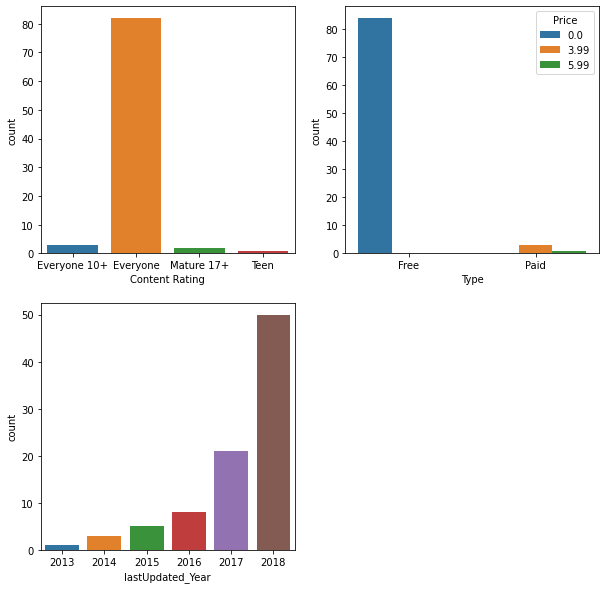

In [220]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.countplot(data=education, x="Content Rating")

plt.subplot(2,2,2)
sns.countplot(data=education, x="Type", hue="Price")

plt.subplot(2,2,3)
sns.countplot(data=education, x="lastUpdated_Year")

plt.show()

[FR] La grande majorité du marché ne comprend pas d'applications payantes. Il serait donc déconseillé de lancer une application payante. Les applications sont mises à jour et la plupart d'entre elles sont accessibles à tous (y compris aux enfants). 
En même temps, regardons les thèmes des applications payantes. Il pourrait y avoir une opportunité de marché en proposant une alternative gratuite à celles-ci. 

[EN] The vast majority of the market does not include paid applications. It would therefore be inadvisable to launch a paid application. The applications are updated and most of them are accessible to everyone (including children). 
At the same time, let's look at the topics of the paid applications. There could be a market opportunity by offering a free alternative to these. 

In [221]:
education.loc[education["Type"] == "Paid"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,nSize,lastUpdated_Year,lastUpdated_Month
851,Sago Mini Hat Maker,Education,4.9,11.0,63M,"1,000+",Paid,3.99,Everyone,2017-07-24,63.0,2017,7
852,Fuzzy Numbers: Pre-K Number Foundation,Education,4.7,21.0,44M,"1,000+",Paid,5.99,Everyone,2017-07-21,44.0,2017,7
853,Toca Life: City,Education,4.7,31085.0,24M,"500,000+",Paid,3.99,Everyone,2018-07-06,24.0,2018,7
854,Toca Life: Hospital,Education,4.7,3528.0,24M,"100,000+",Paid,3.99,Everyone,2018-06-12,24.0,2018,6


[FR] Nous pouvons constater que les quatre jeux représentent soit un monde interactif (Toca Life), soit des jeux éducatifs pour les enfants (Sago Mini Hat Maker & Fuzzy Numbers).

[EN] We can see that the four games represent either an interactive world (Toca Life) or educational games for children (Sago Mini Hat Maker & Fuzzy Numbers). 

[FR] Examinons les termes les plus fréquemment utilisés dans les titres des applications pour avoir une idée générale des thèmes les plus fréquents. 

[EN] Let's look at the most frequent terms used in the titles of the applications to get an overall idea of the most frequent themes. 

In [222]:
words=[]
words=education["App"].str.lower()
wordFreq=words.str.split(expand=True).stack().value_counts()
wordFreq.loc[wordFreq >2 ]

learn          26
-              19
english        19
&               9
free            7
for             6
to              6
languages       6
homework        4
training        4
online          4
courses         4
sat             4
math            4
c++             3
speak           3
japanese        3
test            3
programming     3
study           3
gmat            3
coloring        3
with            3
dtype: int64

[FR] En enlevant les mots de liaisons ou "learn" ou "study", nous pouvons voir qu'il y a des axes majeurs d'apprentissages qui ressortent: 
- L'apprentissage de langues étrangères (++ l'anglais);
- L'aide pour le SAT (examen propre aux Etats-Unis)
- L'aide au devoir? ("homework)
- L'apprentissage de la programmation
- L'apprentissage des maths
- Le coloriage

[EN] By removing the linking words or "learn" or "study", we can see that there are major learning areas that stand out: 
- Learning foreign languages (++ English);
- Help for the SAT (US exam)
- Help with homework
- Learning programming
- Learning maths
- Colouring

[FR]Observons quelles sont les plus grosses applications dans le domaine de l'éducation pour avoir une idée de la population cible.

[EN] Let's look at the biggest applications in the field of education to get an idea of the target population.

In [223]:
education.loc[(education["Installs"] == "1,000,000+") | (education["Installs"] == "5,000,000+") | (education["Installs"] == "10,000,000+") | (education["Installs"] == "50,000,000+") | (education["Installs"] == "100,000,000+")| (education["Installs"] == "500,000,000+")| (education["Installs"] == "1,000,000,000+")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,nSize,lastUpdated_Year,lastUpdated_Month
700,TED,Education,4.6,181893.0,18M,"10,000,000+",Free,0.0,Everyone 10+,2018-07-27,18.0,2018,7
702,Khan Academy,Education,4.6,85375.0,21M,"5,000,000+",Free,0.0,Everyone,2018-07-27,21.0,2018,7
703,Learn English with Wlingua,Education,4.7,314299.0,3.3M,"10,000,000+",Free,0.0,Everyone,2018-05-02,3.3,2018,5
705,Princess Coloring Book,Education,4.5,9770.0,39M,"5,000,000+",Free,0.0,Everyone,2018-02-25,39.0,2018,2
706,Learn Spanish - Español,Education,4.7,32346.0,3.2M,"1,000,000+",Free,0.0,Everyone,2017-12-18,3.2,2017,12
709,English for beginners,Education,4.6,9321.0,27M,"1,000,000+",Free,0.0,Everyone,2018-07-18,27.0,2018,7
710,Flame - درب عقلك يوميا,Education,4.6,56065.0,37M,"1,000,000+",Free,0.0,Everyone,2018-07-26,37.0,2018,7
712,"Learn Japanese, Korean, Chinese Offline & Free",Education,4.9,133136.0,26M,"1,000,000+",Free,0.0,Everyone,2018-07-20,26.0,2018,7
716,Cars Coloring Pages,Education,4.4,1090.0,49M,"1,000,000+",Free,0.0,Everyone,2018-02-03,49.0,2018,2
717,Babbel – Learn Languages,Education,4.3,266948.0,21M,"10,000,000+",Free,0.0,Everyone,2018-07-30,21.0,2018,7


In [224]:
import scipy

In [225]:
quantitative=["Rating","Reviews","Price","nSize"]

In [226]:
name=[]
shapiro=[]
p_value_shap=[]

In [227]:
for i in quantitative:
    shapiro,p_value_shap = scipy.stats.shapiro(education[i])
    print("Le test de normalité pour", i, "est de", round(shapiro,4), "et son p-valeur est de",round(p_value_shap,6))

Le test de normalité pour Rating est de 0.9643 et son p-valeur est de 0.01581
Le test de normalité pour Reviews est de 0.6542 et son p-valeur est de 0.0
Le test de normalité pour Price est de 0.2166 et son p-valeur est de 0.0
Le test de normalité pour nSize est de 0.7977 et son p-valeur est de 0.0


[FR] Les résultats nous montrent bien que l'échantillon n'est pas issu d'une population normalement distribuée. Nous allons donc utiliser le test de corrélation de Spearman et non-celui de pearson.

[EN] The results show us that the sample is not from a normally distributed population. We will therefore use the Spearman correlation coefficient and not the Pearson correlation coefficient.

In [228]:
education_corr=pd.DataFrame({"Rating": education["Rating"],
                             "Reviews": education["Reviews"],
                            "Price": education["Price"],
                             "nSize": education["nSize"]
                })

In [229]:
feat1=[]
feats2=[]
corrs=[]
p_values=[]


In [230]:
for feat2 in education_corr.columns: 
    if feat2 != "Rating":
            feat1.append("Rating")
            feats2.append(feat2)
            corr , p_value = scipy.stats.spearmanr(education_corr["Rating"],education_corr[feat2])
            corrs.append(corr)
            p_values.append(p_value)

corr_df=pd.DataFrame({"Feature 1":feat1,
                      "Feature 2": feats2,
                      "Spearman": corrs,
                      "p-value": p_values})
corr_df

,Feature 1,Feature 2,Spearman,p-value
0,Rating,Reviews,0.458800,0.000007
1,Rating,Price,0.316648,0.002650
2,Rating,nSize,0.178038,0.097005


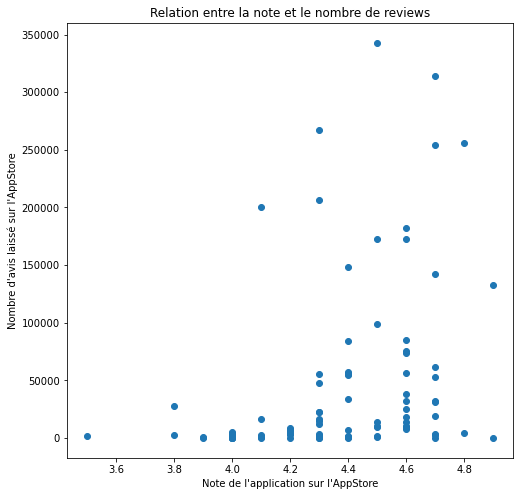

In [231]:
plt.figure(figsize=(8,8))
plt.scatter(education_corr["Rating"], education_corr["Reviews"])
plt.xlabel("Note de l'application sur l'AppStore")
plt.ylabel("Nombre d'avis laissé sur l'AppStore")
plt.title("Relation entre la note et le nombre de reviews")
plt.show()

[FR] Plus il y a d'avis sur l'application, plus la note de l'application est élevée.  Cela peut être le signe d'une communauté active qui est prête à s'impliquer pour améliorer l'application.

[EN] The more reviews there are on the application, the higher the rating of the application.  This can be a sign of an active community that is willing to get involved in improving the application.

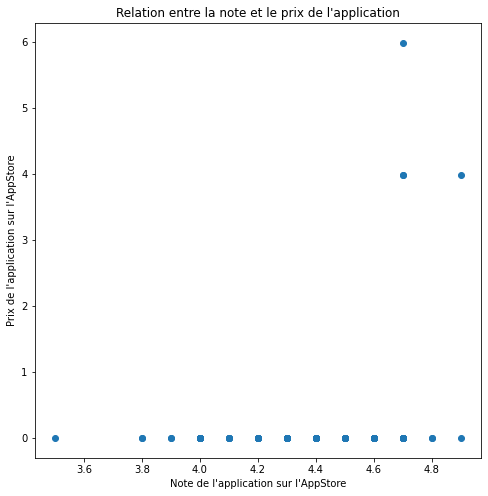

In [232]:
plt.figure(figsize=(8,8))
plt.scatter(education_corr["Rating"], education_corr["Price"])
plt.xlabel("Note de l'application sur l'AppStore")
plt.ylabel("Prix de l'application sur l'AppStore")
plt.title("Relation entre la note et le prix de l'application")
plt.show()

[FR] La mise en place d'un prix s'associe à une plus grosse note. Cela peut s'expliquer par le biais cognitif selon laquel on attribue la valeur du produit à son prix. 

[EN] The establishment of a price is associated with a higher score. This can be explained by the cognitive bias of attributing the value of the product to its price. 

## Quel type d'application d'éducation? [What kind of education application? ]

[FR] Nous évaluerons quel type d'application éducative serait intéressant : un jeu, une application uniquement éducative, etc.

[EN] We will evaluate what kind of educational application would be interesting: a game, an educational application only, etc.

In [233]:
countCat.sort_values(by="bigSoft", ascending=False)

,count,mean,std,min,25%,50%,75%,max,bigSoft,%bigSoft
Category,,,,,,,,,,
Gaming,833.0,4.236014,0.393974,1.0,4.100,4.30,4.500,5.0,92,0.110444
Family,1566.0,4.186526,0.520153,1.0,4.000,4.30,4.500,5.0,43,0.027458
Tools,628.0,4.007484,0.639920,1.0,3.800,4.20,4.400,5.0,24,0.038217
Photography,204.0,4.114216,0.536219,2.0,4.000,4.20,4.500,5.0,13,0.063725
Video Players,113.0,4.022124,0.598172,1.8,3.700,4.20,4.400,4.9,10,0.088496
Sports,223.0,4.204036,0.483448,1.5,4.000,4.30,4.500,5.0,8,0.035874
Productivity,223.0,4.132735,0.589514,1.0,4.000,4.20,4.500,5.0,8,0.035874
Communication,189.0,4.076720,0.522054,1.0,3.900,4.20,4.400,5.0,7,0.037037
Entertainment,64.0,4.154688,0.311642,3.0,4.000,4.20,4.325,4.7,6,0.093750


[FR] On constate que les applications de jeux sont les plus susceptibles de connaître un grand succès (10 % des applications dépassent les 50 millions d'installations).

[EN] We can see that gaming applications are the most likely to become successful (10% of applications exceed 50 million installations)

[FR] Analysons les termes fréquemment utilisés dans les titres des applications de jeux.

[EN] Let's analyse the terms frequently used in the titles of gaming applications. 

In [234]:
gaming=df.loc[df["Category"] == "Gaming"]

In [235]:
words_gaming=[]
words_gaming=gaming["App"].str.lower()
wordFreq_gaming=words_gaming.str.split(expand=True).stack().value_counts()
wordFreq_gaming.loc[wordFreq_gaming >10 ]

-            76
the          47
game         45
of           39
free         36
3d           30
2            30
poker        22
simulator    19
for          19
at           19
zombie       19
games        18
racing       17
car          16
ae           16
gun          16
nights       16
survival     16
city         16
:            16
3            15
&            15
texas        15
a            15
fps          14
war          12
sniper       12
super        12
classic      12
hunter       12
shooting     12
shooter      12
2018         12
crime        12
–            12
mobile       11
in           11
driving      11
dr.          11
dtype: int64

[FR] Deux familles de termes se distinguent dans l'analyse des applications des jeux vidéo : les courses automobiles et les jeux de survie/guerre.   

[EN] There are two families of terms that stand out when analysing video game applications: car racing and survival/war games.   

In [236]:
gaming.loc[(gaming["Installs"] == "100,000,000+")| (gaming["Installs"] == "500,000,000+")| (gaming["Installs"] == "1,000,000,000+")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,nSize,lastUpdated_Year,lastUpdated_Month
1653,ROBLOX,Gaming,4.5,4447388.0,67M,"100,000,000+",Free,0.0,Everyone 10+,2018-07-31,67.0,2018,7
1654,Subway Surfers,Gaming,4.5,27722264.0,76M,"1,000,000,000+",Free,0.0,Everyone 10+,2018-07-12,76.0,2018,7
1655,Candy Crush Saga,Gaming,4.4,22426677.0,74M,"500,000,000+",Free,0.0,Everyone,2018-07-05,74.0,2018,7
1660,Clash Royale,Gaming,4.6,23133508.0,97M,"100,000,000+",Free,0.0,Everyone 10+,2018-06-27,97.0,2018,6
1661,Temple Run 2,Gaming,4.3,8118609.0,62M,"500,000,000+",Free,0.0,Everyone,2018-07-05,62.0,2018,7
1662,Pou,Gaming,4.3,10485308.0,24M,"500,000,000+",Free,0.0,Everyone,2018-05-25,24.0,2018,5
1663,Helix Jump,Gaming,4.2,1497361.0,33M,"100,000,000+",Free,0.0,Everyone,2018-04-09,33.0,2018,4
1665,Angry Birds Rio,Gaming,4.4,2610526.0,46M,"100,000,000+",Free,0.0,Everyone,2018-07-03,46.0,2018,7
1666,Plants vs. Zombies FREE,Gaming,4.4,4066989.0,69M,"100,000,000+",Free,0.0,Everyone 10+,2018-07-06,69.0,2018,7
1667,Sonic Dash,Gaming,4.5,3778921.0,75M,"100,000,000+",Free,0.0,Everyone,2018-07-26,75.0,2018,7


In [237]:
gaming_corr=pd.DataFrame({"Rating": gaming["Rating"],
                             "Reviews": gaming["Reviews"],
                            "Price": gaming["Price"],
                             "nSize": gaming["nSize"]
                })

In [259]:
for i in quantitative:
    shapiro_g,p_value_shap_g = scipy.stats.shapiro(gaming[i])
    print("Le test de normalité pour", i, "est de", round(shapiro_g,4), "et son p-valeur est de",round(p_value_shap_g,6))

Le test de normalité pour Rating est de 0.8703 et son p-valeur est de 0.0
Le test de normalité pour Reviews est de 0.2388 et son p-valeur est de 0.0
Le test de normalité pour Price est de 0.2399 et son p-valeur est de 0.0
Le test de normalité pour nSize est de 0.9503 et son p-valeur est de 0.0


In [238]:
feat1_g=[]
feats2_g=[]
corrs_g=[]
p_values_g=[]


In [239]:
for feat2 in gaming_corr.columns: 
    if feat2 != "Rating":
            feat1_g.append("Rating")
            feats2_g.append(feat2)
            corr , p_value = scipy.stats.spearmanr(gaming_corr["Rating"],gaming_corr[feat2])
            corrs_g.append(corr)
            p_values_g.append(p_value)

corr_df_g=pd.DataFrame({"Feature 1":feat1_g,
                      "Feature 2": feats2_g,
                      "Spearman": corrs_g,
                      "p-value": p_values_g})
corr_df_g

,Feature 1,Feature 2,Spearman,p-value
0,Rating,Reviews,0.267282,4.301914e-15
1,Rating,Price,0.122589,3.908271e-04
2,Rating,nSize,0.119886,5.254366e-04


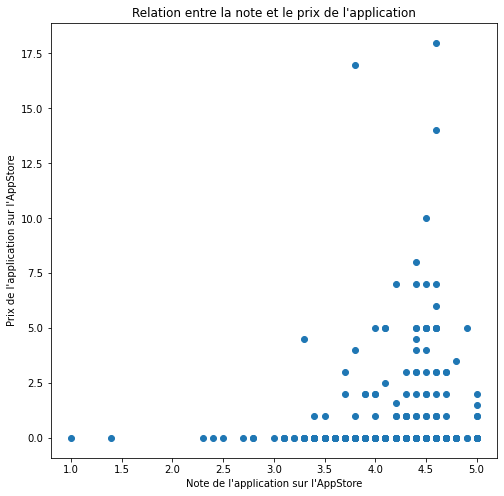

In [240]:
plt.figure(figsize=(8,8))
plt.scatter(gaming_corr["Rating"], gaming_corr["Price"])
plt.xlabel("Note de l'application sur l'AppStore")
plt.ylabel("Prix de l'application sur l'AppStore")
plt.title("Relation entre la note et le prix de l'application")
plt.show()

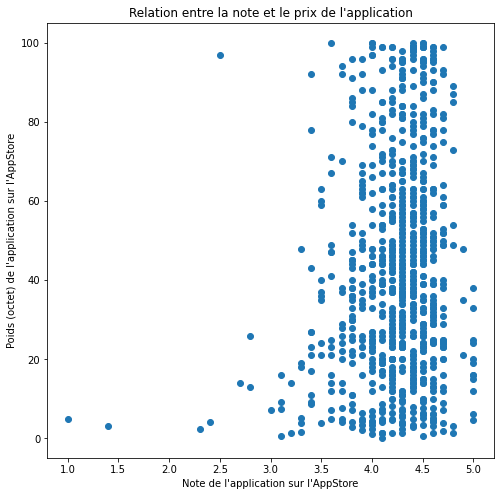

In [241]:
plt.figure(figsize=(8,8))
plt.scatter(gaming_corr["Rating"], gaming_corr["nSize"])
plt.xlabel("Note de l'application sur l'AppStore")
plt.ylabel("Poids (octet) de l'application sur l'AppStore")
plt.title("Relation entre la note et le prix de l'application")
plt.show()

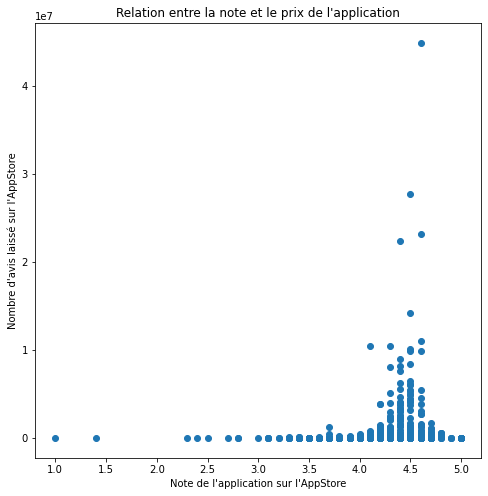

In [242]:
plt.figure(figsize=(8,8))
plt.scatter(gaming_corr["Rating"], gaming_corr["Reviews"])
plt.xlabel("Note de l'application sur l'AppStore")
plt.ylabel("Nombre d'avis laissé sur l'AppStore")
plt.title("Relation entre la note et le prix de l'application")
plt.show()

[FR] Ayant une vocation familiale, nous pouvons également regarder la catégorie famille qui contient des applications de multiples autres catégories.

[EN] Being family oriented, we can also look at the family category which contains applications from multiple other categories.

In [243]:
family=df.loc[df["Category"] == "Family"]
family

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,nSize,lastUpdated_Year,lastUpdated_Month
2015,Candy Bomb,Family,4.4,42145.0,20M,"10,000,000+",Free,0.0,Everyone,2018-07-04,20.0,2018,7
2016,ROBLOX,Family,4.5,4449910.0,67M,"100,000,000+",Free,0.0,Everyone 10+,2018-07-31,67.0,2018,7
2017,Jewels Crush- Match 3 Puzzle,Family,4.4,14774.0,19M,"1,000,000+",Free,0.0,Everyone,2018-07-23,19.0,2018,7
2018,Coloring & Learn,Family,4.4,12753.0,51M,"5,000,000+",Free,0.0,Everyone,2018-07-17,51.0,2018,7
2019,Mahjong,Family,4.5,33983.0,22M,"5,000,000+",Free,0.0,Everyone,2018-08-02,22.0,2018,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10820,Fr. Daoud Lamei,Family,5.0,22.0,8.6M,"1,000+",Free,0.0,Teen,2018-06-27,8.6,2018,6
10827,Fr Agnel Ambarnath,Family,4.2,117.0,13M,"5,000+",Free,0.0,Everyone,2018-06-13,13.0,2018,6
10834,FR Calculator,Family,4.0,7.0,2.6M,500+,Free,0.0,Everyone,2017-06-18,2.6,2017,6
10836,Sya9a Maroc - FR,Family,4.5,38.0,53M,"5,000+",Free,0.0,Everyone,2017-07-25,53.0,2017,7


In [244]:
words_fam=[]
words_fam=family["App"].str.lower()
wordFreq_fam=words_fam.str.split(expand=True).stack().value_counts()
wordFreq_fam.loc[wordFreq_fam >15]

-            188
for           86
the           69
simulator     64
&             59
and           54
free          48
games         43
game          43
of            41
by            41
my            40
kids          39
er            37
learn         35
doctor        33
number        30
3d            29
surgery       29
english       28
color         27
2             25
:             24
2018          22
dx            22
c             22
test          22
car           21
dr.           21
ap            21
emergency     21
virtual       20
coloring      19
cg            19
hospital      19
in            19
a             19
3             18
art           18
tv            17
–             17
mobile        17
app           16
ef            16
driving       16
dtype: int64

[FR] Nous retrouvons des sujets similaires à la catégorie gaming. 

[EN] We find similar topics to the gaming category. 

In [245]:
df.loc[(df["Category"] == "Gaming") & ((df["Installs"] == "100,000,000+")| (df["Installs"] == "500,000,000+")| (df["Installs"] == "1,000,000,000+"))]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,nSize,lastUpdated_Year,lastUpdated_Month
1653,ROBLOX,Gaming,4.5,4447388.0,67M,"100,000,000+",Free,0.0,Everyone 10+,2018-07-31,67.0,2018,7
1654,Subway Surfers,Gaming,4.5,27722264.0,76M,"1,000,000,000+",Free,0.0,Everyone 10+,2018-07-12,76.0,2018,7
1655,Candy Crush Saga,Gaming,4.4,22426677.0,74M,"500,000,000+",Free,0.0,Everyone,2018-07-05,74.0,2018,7
1660,Clash Royale,Gaming,4.6,23133508.0,97M,"100,000,000+",Free,0.0,Everyone 10+,2018-06-27,97.0,2018,6
1661,Temple Run 2,Gaming,4.3,8118609.0,62M,"500,000,000+",Free,0.0,Everyone,2018-07-05,62.0,2018,7
1662,Pou,Gaming,4.3,10485308.0,24M,"500,000,000+",Free,0.0,Everyone,2018-05-25,24.0,2018,5
1663,Helix Jump,Gaming,4.2,1497361.0,33M,"100,000,000+",Free,0.0,Everyone,2018-04-09,33.0,2018,4
1665,Angry Birds Rio,Gaming,4.4,2610526.0,46M,"100,000,000+",Free,0.0,Everyone,2018-07-03,46.0,2018,7
1666,Plants vs. Zombies FREE,Gaming,4.4,4066989.0,69M,"100,000,000+",Free,0.0,Everyone 10+,2018-07-06,69.0,2018,7
1667,Sonic Dash,Gaming,4.5,3778921.0,75M,"100,000,000+",Free,0.0,Everyone,2018-07-26,75.0,2018,7


In [246]:
df.loc[(df["Category"] == "Family") & ((df["Installs"] == "100,000,000+")| (df["Installs"] == "500,000,000+")| (df["Installs"] == "1,000,000,000+"))]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,nSize,lastUpdated_Year,lastUpdated_Month
2016,ROBLOX,Family,4.5,4449910.0,67M,"100,000,000+",Free,0.0,Everyone 10+,2018-07-31,67.0,2018,7
3879,Pou,Family,4.3,10483141.0,24M,"500,000,000+",Free,0.0,Everyone,2018-05-25,24.0,2018,5
3910,My Talking Angela,Family,4.5,9876369.0,99M,"100,000,000+",Free,0.0,Everyone,2018-07-03,99.0,2018,7
3930,Flow Free,Family,4.3,1295293.0,11M,"100,000,000+",Free,0.0,Everyone,2018-04-11,11.0,2018,4
3975,Hay Day,Family,4.5,10053186.0,94M,"100,000,000+",Free,0.0,Everyone,2018-06-28,94.0,2018,6
3986,Clash of Clans,Family,4.6,44881447.0,98M,"100,000,000+",Free,0.0,Everyone 10+,2018-07-15,98.0,2018,7
3987,Clash Royale,Family,4.6,23125280.0,97M,"100,000,000+",Free,0.0,Everyone 10+,2018-06-27,97.0,2018,6
3994,Candy Crush Saga,Family,4.4,22419455.0,74M,"500,000,000+",Free,0.0,Everyone,2018-07-05,74.0,2018,7
4055,Plants vs. Zombies FREE,Family,4.4,4064868.0,69M,"100,000,000+",Free,0.0,Everyone 10+,2018-07-06,69.0,2018,7
4111,Talking Tom Cat 2,Family,4.3,3213548.0,55M,"100,000,000+",Free,0.0,Everyone 10+,2018-07-25,55.0,2018,7


[FR]Nous pouvons voir qu'il y a beaucoup de variabilité dans les jeux proposé parmis les plus grosses applications (+ de 100 millions d'installation) mais globalement, en enlevant les MMORPG, ils se concentrent sur des jeux de types arcade, course ou guerre)

[EN] We can see that there is a lot of variability in the biggest gaming applications (over 100 million installations) but overall, if we remove the MMORPGs, they focus on arcade, racing or war type games)

In [247]:
family_corr=pd.DataFrame({"Rating": family["Rating"],
                             "Reviews": family["Reviews"],
                            "Price": family["Price"],
                             "nSize": family["nSize"]
                })

In [260]:
for i in quantitative:
    shapiro_f,p_value_shap_f = scipy.stats.shapiro(family[i])
    print("Le test de normalité pour", i, "est de", round(shapiro_f,4), "et son p-valeur est de",round(p_value_shap_f,6))

Le test de normalité pour Rating est de 0.8949 et son p-valeur est de 0.0
Le test de normalité pour Reviews est de 0.077 et son p-valeur est de 0.0
Le test de normalité pour Price est de 0.0395 et son p-valeur est de 0.0
Le test de normalité pour nSize est de 0.8822 et son p-valeur est de 0.0


In [248]:
feat1_f=[]
feats2_f=[]
corrs_f=[]
p_values_f=[]

In [249]:
for feat2 in family_corr.columns: 
    if feat2 != "Rating":
            feat1_f.append("Rating")
            feats2_f.append(feat2)
            corr , p_value = scipy.stats.spearmanr(family_corr["Rating"],family_corr[feat2])
            corrs_f.append(corr)
            p_values_f.append(p_value)

corr_df_f=pd.DataFrame({"Feature 1":feat1_f,
                      "Feature 2": feats2_f,
                      "Spearman": corrs_f,
                      "p-value": p_values_f})
corr_df_f

,Feature 1,Feature 2,Spearman,p-value
0,Rating,Reviews,-0.010518,0.677467
1,Rating,Price,0.091305,0.000297
2,Rating,nSize,-0.003044,0.904196


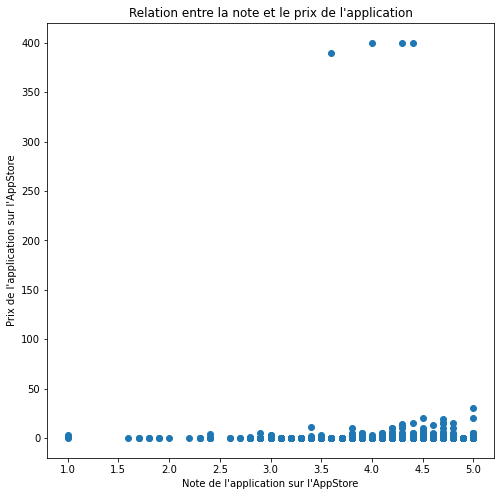

In [250]:
plt.figure(figsize=(8,8))
plt.scatter(family_corr["Rating"], family_corr["Price"])
plt.xlabel("Note de l'application sur l'AppStore")
plt.ylabel("Prix de l'application sur l'AppStore")
plt.title("Relation entre la note et le prix de l'application")
plt.show()

[FR] Nous nous rendons compte qu'il y a 4 outliers qui faussent complètement l'analyse de l'influence du prix dans les applications de famille.

[EN] We realise that there are 4 outliers that completely distort the analysis of the influence of price in family applications.

In [251]:
family_corr=family_corr.loc[family_corr["Price"] < 50]

[FR] Nous allons donc recalculer les corrélations.

[EN] We will therefore recalculate the correlations.

In [252]:
feat1_f=[]
feats2_f=[]
corrs_f=[]
p_values_f=[]
for feat2 in family_corr.columns: 
    if feat2 != "Rating":
            feat1_f.append("Rating")
            feats2_f.append(feat2)
            corr , p_value = scipy.stats.spearmanr(family_corr["Rating"],family_corr[feat2])
            corrs_f.append(corr)
            p_values_f.append(p_value)

corr_df_f=pd.DataFrame({"Feature 1":feat1_f,
                      "Feature 2": feats2_f,
                      "Spearman": corrs_f,
                      "p-value": p_values_f})
corr_df_f

,Feature 1,Feature 2,Spearman,p-value
0,Rating,Reviews,-0.010855,0.668146
1,Rating,Price,0.096373,0.000136
2,Rating,nSize,-0.003944,0.876222


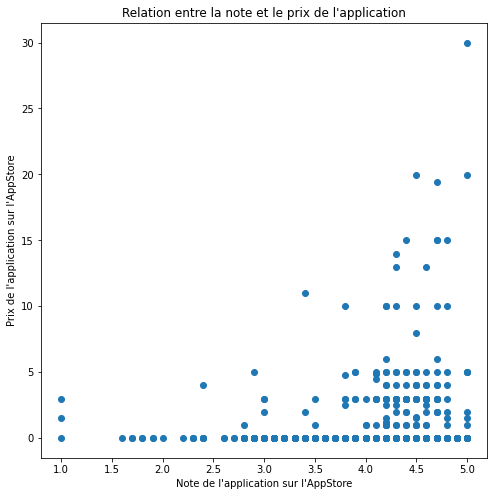

In [253]:
plt.figure(figsize=(8,8))
plt.scatter(family_corr["Rating"], family_corr["Price"])
plt.xlabel("Note de l'application sur l'AppStore")
plt.ylabel("Prix de l'application sur l'AppStore")
plt.title("Relation entre la note et le prix de l'application")
plt.show()

[FR] Le prix est également corrélé, peut-être pour la même raison que celle mentionnée ci-dessus : le biais cognitif consistant à attribuer la valeur du produit à son prix. 

[EN] Price is also correlated, perhaps for the same reason as mentioned above: the cognitive bias of attributing the value of the product to its price. 

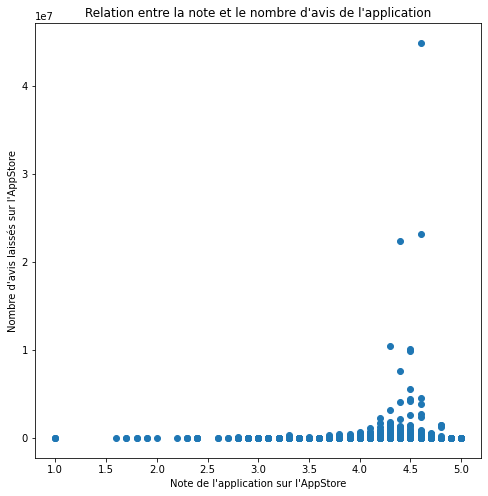

In [257]:
plt.figure(figsize=(8,8))
plt.scatter(family_corr["Rating"], family_corr["Reviews"])
plt.xlabel("Note de l'application sur l'AppStore")
plt.ylabel("Nombre d'avis laissés sur l'AppStore")
plt.title("Relation entre la note et le nombre d'avis de l'application")
plt.show()

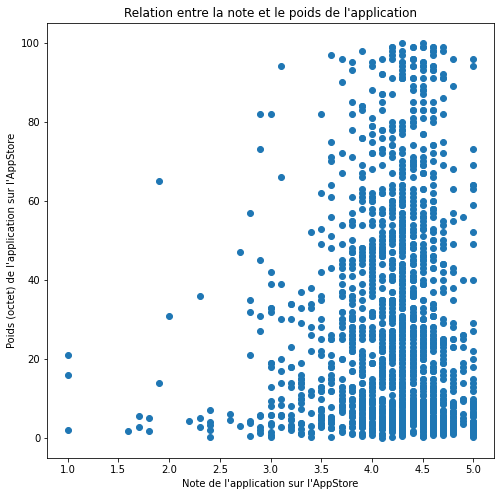

In [256]:
plt.figure(figsize=(8,8))
plt.scatter(family_corr["Rating"], family_corr["nSize"])
plt.xlabel("Note de l'application sur l'AppStore")
plt.ylabel("Poids (octet) de l'application sur l'AppStore")
plt.title("Relation entre la note et le poids de l'application")
plt.show()

# Sur la base de l'analyse du marché, nous recommandons le type d'application suivant : un jeu éducatif destiné aux enfants/adolescents et/ou adultes pour apprendre la programmation.
Nous proposons qu'à travers la programmation, l'enfant et/ou l'adolescent et/ou l'adulte puisse participer à la création, à la mise en œuvre, et enfin jouer à de nombreux mini-jeux (par exemple, course de voitures, survie, course/poursuite).
Les justifications sont nombreuses : 
- La catégorie des applis éducatives n'a pas encore d'applis à succès, malgré une note moyenne plutôt élevée et une forte participation de la communauté à travers les avis.
- Il y a de solides arguments sur le fait d'être répertorié dans la catégorie "éducation" et non "Famille", cette dernière perd en précision car elle englobe de nombreux genres différents.
- Les deux niches des applications éducatives sont les langues étrangères et la programmation.
- La programmation étant un domaine en croissance sur le marché du travail actuel, nous proposons que l'application soit axée sur l'apprentissage de la programmation. 
- Les applications de jeux sont les plus présentes sur l'Appstore et ont le pourcentage le plus élevé de conversion en applications réussies. 
-Le poids de l'application n'étant pas statistiquement corrélé à la note moyenne de l'application dans la catégorie éducation et famille, le format jeu vidéo (poids moyen le plus élevé) peut être intéressant. En même temps, les applications les plus lourdes ne doivent pas être privilégiées car dans la catégorie des jeux vidéo, le poids de l'application est corrélé à la note. 
-La possibilité d'avoir du contenu payant dans l'application (ex : mini-jeux à débloquer, personnage à styliser) pourrait permettre d'avoir une meilleure moyenne sur le long terme. La mise en place d'un prix pour télécharger l'application n'est pas recommandée étant donné le faible pourcentage d'applications payantes dans ce type de catégorie.
-Il est important de suivre le nombre d'installations, l'évolution de la note moyenne et l'implication de la communauté (nombre de critiques). 

# Based on the market analysis, we recommend the following type of application: an educational game for children/adolescents and/or adults to learn programming.
We propose that through programming, the child and/or teenager and/or adult can participate in the creation, implementation, and finally play numerous mini-games (e.g., car race, survival, race/chase).
The justifications are numerous: 
- The education app category does not yet have a successful app, despite a rather high average rating and high community participation through reviews.
- There is a strong case to be made for being listed within the "education" category and not "Family", which loses precision as it encompasses many different genres.
- The two niches in education applications are foreign languages and programming.
- Since programming is a growth area in the current labour market, we propose that the application should focus on learning to program. 
- Game applications are the most present on the Appstore and have the highest percentage of conversion into successful applications. 
-As the weight of the application is not statistically correlated to the average rating of the application in the education and family category, the video game format (highest average weight) can be interesting. At the same time, the heaviest applications should not be equated because in the gaming category the weight of the application is correlated with the rating.  
-The possibility of having paid content in the application (e.g.: mini-games to unlock, character to style) could allow to have a better average in the long term. The implementation of a price to download the application is not recommended given the low percentage of paying applications in this type of category.
-[KPIs]It is important to monitor the number of installations, the evolution of the average rating and the involvement of the community (number of reviews). 